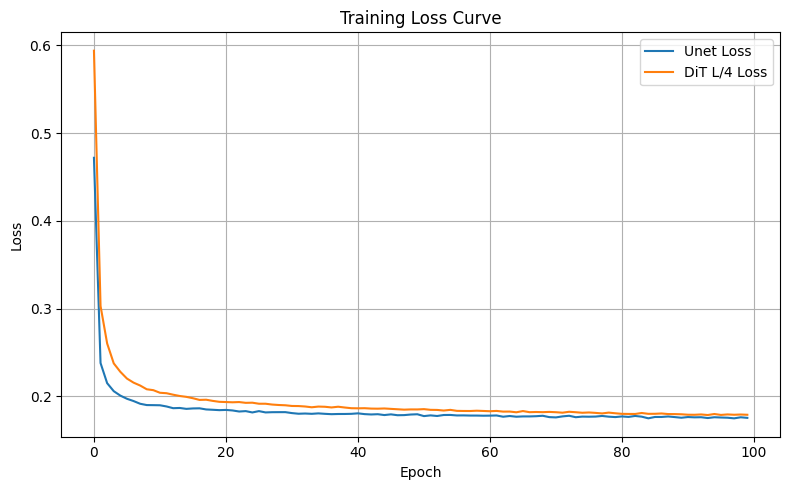

In [13]:
import matplotlib.pyplot as plt
import json
import os

# Paths to the log files
unet_log_path = os.path.join(os.getcwd(), 'unet/log.txt')
vit_log_path = os.path.join(os.getcwd(), 'vit_L_4/log.txt')

def extract_loss_and_epoch(log_path):
    epochs = []
    losses = []
    if not os.path.exists(log_path):
        print(f'File not found: {log_path}')
        return epochs, losses
    with open(log_path, 'r') as f:
        for line in f:
            try:
                data = json.loads(line)
                if 'train_loss' in data and 'epoch' in data:
                    losses.append(data['train_loss'])
                    epochs.append(data['epoch'])
            except json.JSONDecodeError:
                pass
    return epochs, losses

# Extract data for both models
unet_epochs, unet_losses = extract_loss_and_epoch(unet_log_path)
vit_epochs, vit_losses = extract_loss_and_epoch(vit_log_path)

plt.figure(figsize=(8, 5))
if unet_losses:
    plt.plot(unet_epochs, unet_losses, label='Unet Loss')
else:
    print('No Unet loss values found.')
if vit_losses:
    plt.plot(vit_epochs, vit_losses, label='DiT L/4 Loss')
else:
    print('No DiT L/4 loss values found.')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Display DiT model architecture and number of parameters
import sys
sys.path.append(os.path.join(os.getcwd(), '../../..'))  # Adjust path to import from flow_matching

import torch

# Try to import DiT model (adjust import path as needed)
try:
    from examples.image.models.vit import DiT
except ImportError:
    print('Could not import DiT model. Please check the import path.')
    DiT = None

if DiT is not None:
    # Example: instantiate DiT with dummy config (update as needed)
    model = DiT(
        image_size=32,  # Example value, update as needed
        patch_size=4,   # Example value, update as needed
        in_channels=3,  # Example value, update as needed
        num_classes=10, # Example value, update as needed
        embed_dim=256,  # Example value, update as needed
        depth=12,       # Example value, update as needed
        num_heads=8     # Example value, update as needed
    )
    print(model)
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Number of trainable parameters: {num_params}")
else:
    print('DiT model is not available.')